In [0]:
# In this notebook, we practice some of the well-known classification methods.
# We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.
# Lets first load required libraries:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
# ### About dataset

# This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:
# 
# | Field          | Description                                                                           |
# |----------------|---------------------------------------------------------------------------------------|
# | Loan_status    | Whether a loan is paid off on in collection                                           |
# | Principal      | Basic principal loan amount at the                                                    |
# | Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
# | Effective_date | When the loan got originated and took effects                                         |
# | Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
# | Age            | Age of applicant                                                                      |
# | Education      | Education of applicant                                                                |
# | Gender         | The gender of applicant                                                               |

# Let's download the dataset:

path_train = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"
df_train = pd.read_csv(path_train)
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
# We can drop the first two columns from the dataframe.

df_train.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
df_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
# Convert to date time object 

df_train['due_date'] = pd.to_datetime(df_train['due_date'])
df_train['effective_date'] = pd.to_datetime(df_train['effective_date'])
df_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
# Let's get some information about the dataframe

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null datetime64[ns]
due_date          346 non-null datetime64[ns]
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.7+ KB
None


In [6]:
# Let’s see how many of each class is in our data set.

df_train["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

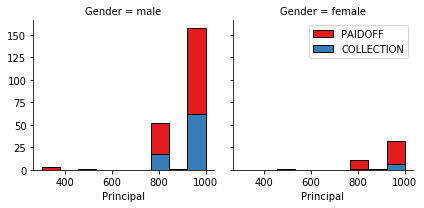

In [7]:
# 260 people have paid off the loan on time while 86 have gone into collection 
# 

# Lets plot some columns to underestand data better:

bins = np.linspace(df_train.Principal.min(), df_train.Principal.max(), 10)
g = sns.FacetGrid(df_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

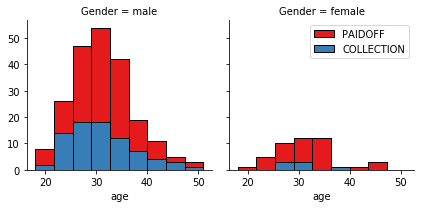

In [8]:
bins = np.linspace(df_train.age.min(), df_train.age.max(), 10)
g = sns.FacetGrid(df_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

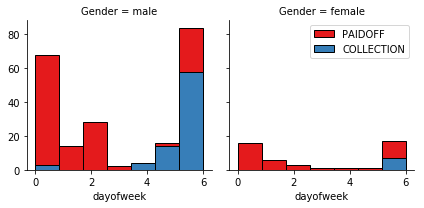

In [9]:
# # Pre-processing:  Feature selection/extraction

# ### Lets look at the day of the week people get the loan 

df_train['dayofweek'] = df_train['effective_date'].dt.dayofweek
bins = np.linspace(df_train.dayofweek.min(), df_train.dayofweek.max(), 8)
g = sns.FacetGrid(df_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [10]:
# We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

df_train['weekend'] = df_train['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [11]:
# ## Convert Categorical features to numerical values

# Lets look at gender:
# I will print out both the standardized and non-standardized data just so that I can look for any group that may have unsufficient representation.

print(df_train.groupby(['Gender'])['loan_status'].value_counts())

print(df_train.groupby(['Gender'])['loan_status'].value_counts(normalize=True))

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64
Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64


In [12]:
# 86 % of female pay there loans while only 73 % of males pay there loan
# Lets convert male to 0 and female to 1:

df_train['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [13]:
# How about education?

print(df_train.groupby(['education'])['loan_status'].value_counts())

print(df_train.groupby(['education'])['loan_status'].value_counts(normalize=True))

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64
education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64


In [14]:
# As you can see, the group of Master and Above has only two data points which seems insufficient for classification. So, I will later drop this group altogether.
# Feature befor One Hot Encoding

df_train[['Principal','terms','age','Gender','education', 'weekend']].head()

,Principal,terms,age,Gender,education,weekend
0,1000,30,45,0,High School or Below,0
1,1000,30,33,1,Bechalor,0
2,1000,15,27,0,college,0
3,1000,30,28,1,college,1
4,1000,30,29,0,college,1


In [15]:
# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

Features = df_train[['Principal','terms','age','Gender','weekend']]
Features = pd.concat([Features,pd.get_dummies(df_train['education'])], axis=1)
Features.drop(['Master or Above'], axis=1, inplace=True)
Features.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [16]:
# Now, we define the arrays of X and y.

X = Features.values.astype("float")
y = df_train['loan_status'].values

print(X[0:5,:])
print(y[0:5])

[[1000.   30.   45.    0.    0.    0.    1.    0.]
 [1000.   30.   33.    1.    0.    1.    0.    0.]
 [1000.   15.   27.    0.    0.    0.    0.    1.]
 [1000.   30.   28.    1.    1.    0.    0.    1.]
 [1000.   30.   29.    0.    1.    0.    0.    1.]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [0]:
# K Nearest Neighbor(KNN)
# First, we should find the best k to build the model with the best accuracy.
# **warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.
# Let's import the necessary libraries:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

The best Jaccard's score was 0.74 with k = 7


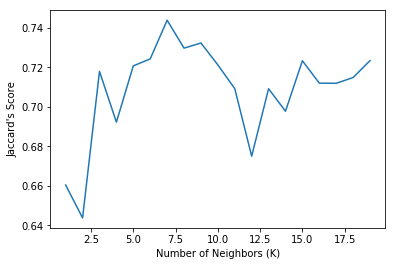

In [18]:
# I wil be using the cross validation method for measuring the accuracy of the model.
# P.S.1 Honestly, here because we are only trying to find the best k for the KNN model, it is an overkill to use the cross validation method.
# However, I am going to use it anyway just for the sake of presentation.
# P.S.2 Instead the for loop below, I could use the function GridSearchCV to make the code more efficient.

Ks = 20
jacc_score_knn = np.zeros(Ks-1)

for n in range(1, Ks):

  # Standardize the data and cnstruct the model
  X_std = preprocessing.StandardScaler().fit(X).transform(X)
  neigh_n = KNeighborsClassifier(n_neighbors=n)
  
  # Perform cross validation and store the averaged accuracy
  scores = cross_val_score(neigh_n, X_std, y, cv=10, scoring='accuracy')
  jacc_score_knn[n-1] = scores.mean()

# Plot and print the results
plt.plot(range(1, Ks), jacc_score_knn)
plt.ylabel('Jaccard\'s Score')
plt.xlabel('Number of Neighbors (K)')

print("The best Jaccard's score was {:.2f}" .format(jacc_score_knn.max()), "with k =", jacc_score_knn.argmax()+1)

In [19]:
# Now that we have the best k, we will construct the best KNN model which will be later applied to the actual test set.
# Please note that the dataset is already standardized in the previous step.

neigh_n = KNeighborsClassifier(n_neighbors=jacc_score_knn.argmax()+1).fit(X_std, y)
neigh_n

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [20]:
# Decision Tree
# For this method, similar to the KNN method, first I have to find the best max_depth. I also want to find the best criterion between the supported ones which are gini and entropy.
# In order to achieve that, I will be using the SerachGridCV from the sklearn to iterate through all of the possible combinations and find the best one.
# The maximum depth and the criterion at which we achieve the maximum score will be our best and chosen combination for the final model.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
MD_range = list(range(3,21))
criterion_options = ["entropy", "gini"]

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=MD_range, criterion=criterion_options)
print(param_grid)

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'criterion': ['entropy', 'gini']}


In [21]:
# Construct the model and fit the grid
loan_tree = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(loan_tree, param_grid, cv=10, scoring='accuracy', return_train_score='False')
grid.fit(X_std, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='False',
       scoring='accuracy', verbose=0)

In [22]:
# View the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.699422,0.108828,"{'criterion': 'entropy', 'max_depth': 3}"
1,0.696532,0.094123,"{'criterion': 'entropy', 'max_depth': 4}"
2,0.656069,0.126098,"{'criterion': 'entropy', 'max_depth': 5}"
3,0.644509,0.147967,"{'criterion': 'entropy', 'max_depth': 6}"
4,0.664740,0.125235,"{'criterion': 'entropy', 'max_depth': 7}"
5,0.658960,0.144776,"{'criterion': 'entropy', 'max_depth': 8}"
6,0.658960,0.148453,"{'criterion': 'entropy', 'max_depth': 9}"
7,0.670520,0.161963,"{'criterion': 'entropy', 'max_depth': 10}"
8,0.670520,0.165347,"{'criterion': 'entropy', 'max_depth': 11}"
9,0.687861,0.161326,"{'criterion': 'entropy', 'max_depth': 12}"


In [23]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6994219653179191
{'criterion': 'entropy', 'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


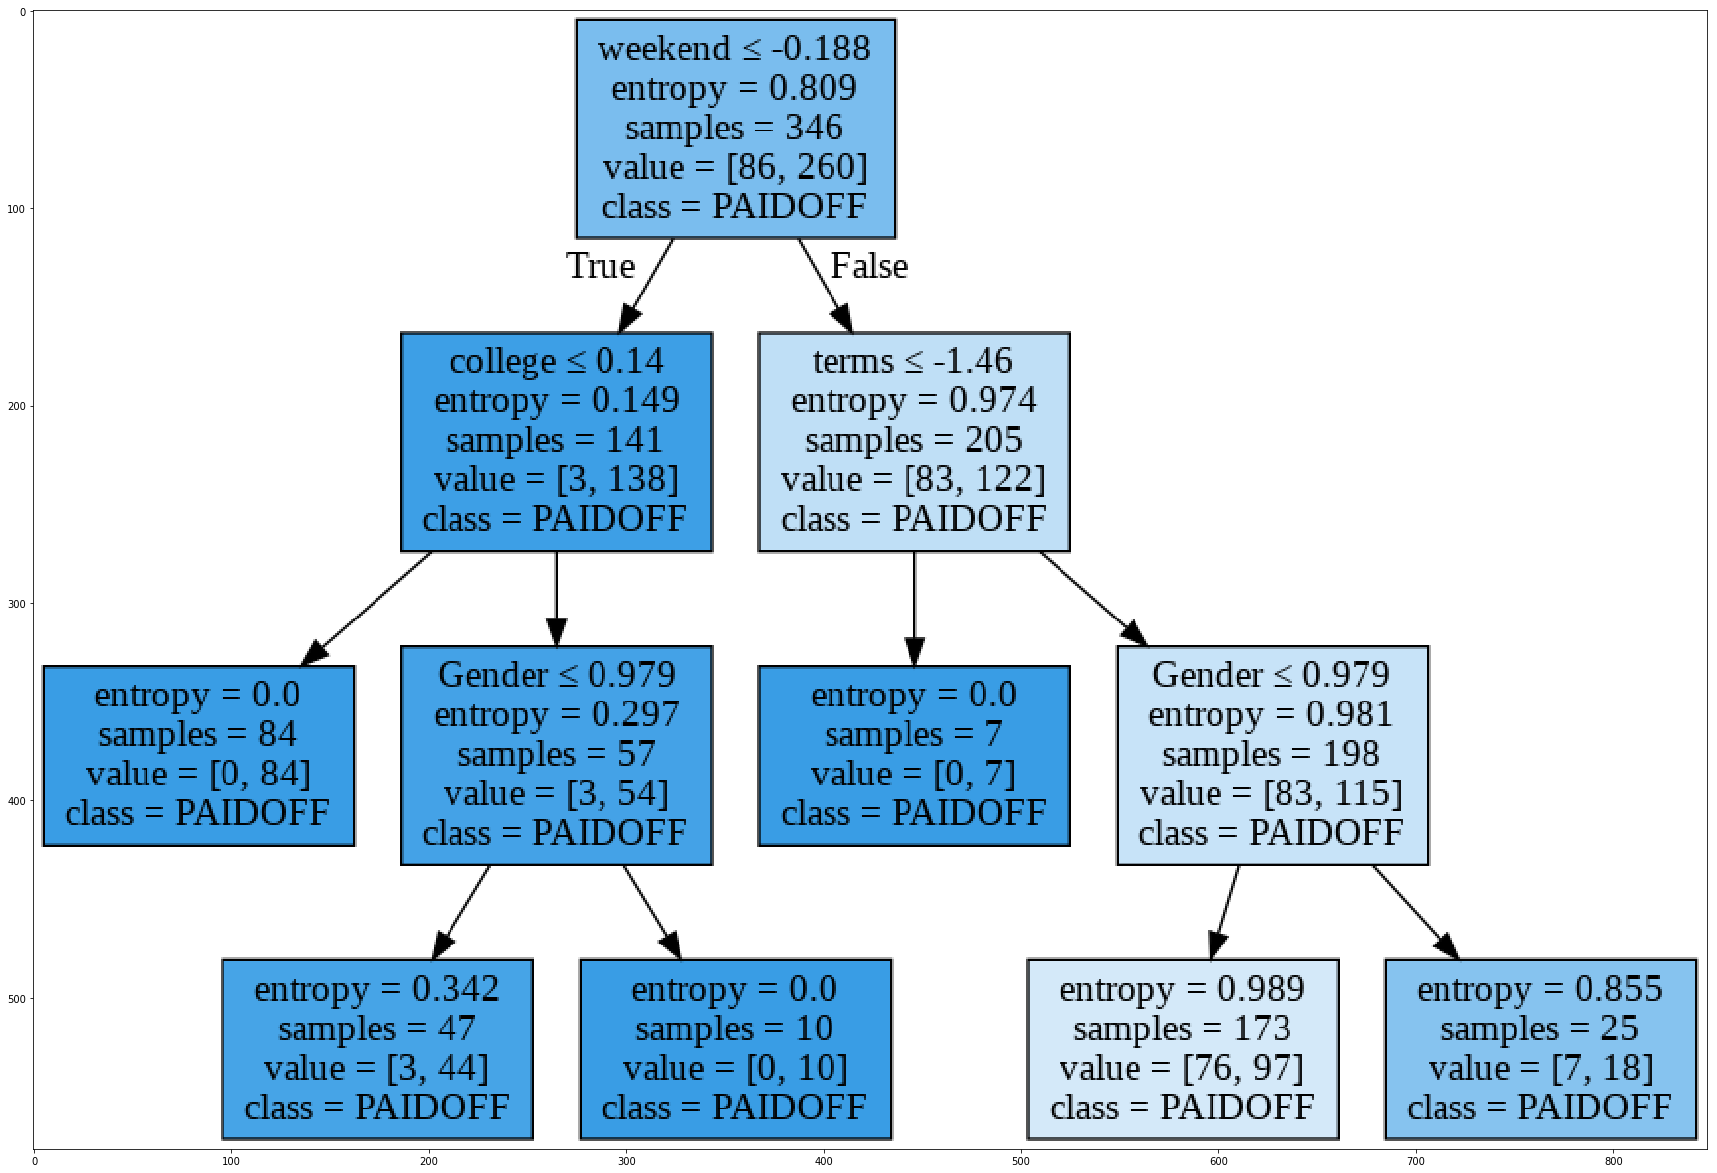

In [24]:
# Now that we have found the best max_depth for the Decision Tree model, we can train the model using the whole train set and visualize the result.
# Note that the whole train set was previously standardized.

loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0).fit(X_std, y)

# Visual  the Decision Tree
# The code below saves the Decision Tree as an image.

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = 'LoanTree.png'
featureNames = Features.columns
targetNames = df_train['loan_status'].unique().tolist()
out = tree.export_graphviz(loan_tree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
fig, ax = plt.subplots(figsize=(30, 60))
plt.imshow(img, interpolation='nearest')

In [25]:
# Logistic Regression
# Similar to the previous methods, first we want to find the best hyperparamters of the model. So, we utilize the GridSearchCV from sklearn library.

from sklearn.linear_model import LogisticRegression

# Define the parameter values that should be searched
penalty_options = ['l1', 'l2' ]
C_range = list(np.logspace(-3, 2, 20))
solver_options = ['liblinear']

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_options, C=C_range, solver=solver_options)
print(param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.0018329807108324356, 0.003359818286283781, 0.006158482110660267, 0.011288378916846888, 0.02069138081114789, 0.0379269019073225, 0.06951927961775606, 0.12742749857031335, 0.23357214690901212, 0.42813323987193913, 0.7847599703514607, 1.438449888287663, 2.636650898730358, 4.832930238571752, 8.858667904100823, 16.23776739188721, 29.763514416313193, 54.555947811685144, 100.0], 'solver': ['liblinear']}


In [26]:
# Construct the model and fit the grid
loanLR = LogisticRegression(random_state=0)
grid = GridSearchCV(loanLR, param_grid, cv=10, scoring='accuracy', return_train_score='False')
grid.fit(X_std, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.0018329807108324356, 0.003359818286283781, 0.006158482110660267, 0.011288378916846888, 0.02069138081114789, 0.0379269019073225, 0.06951927961775606, 0.12742749857031335, 0.23357214690901212, 0.42813323987193913, 0.7847599703514607, 1.438449888287663, 2.636650898730358, 4.832930238571752, 8.858667904100823, 16.23776739188721, 29.763514416313193, 54.555947811685144, 100.0], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='False',
       scoring='accuracy', verbose=0)

In [27]:
# View the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.248555,0.010672,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
1,0.682081,0.107344,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli..."
2,0.248555,0.010672,"{'C': 0.0018329807108324356, 'penalty': 'l1', ..."
3,0.682081,0.103426,"{'C': 0.0018329807108324356, 'penalty': 'l2', ..."
4,0.248555,0.010672,"{'C': 0.003359818286283781, 'penalty': 'l1', '..."
5,0.690751,0.096338,"{'C': 0.003359818286283781, 'penalty': 'l2', '..."
6,0.248555,0.010672,"{'C': 0.006158482110660267, 'penalty': 'l1', '..."
7,0.693642,0.087605,"{'C': 0.006158482110660267, 'penalty': 'l2', '..."
8,0.248555,0.010672,"{'C': 0.011288378916846888, 'penalty': 'l1', '..."
9,0.693642,0.087605,"{'C': 0.011288378916846888, 'penalty': 'l2', '..."


In [28]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7514450867052023
{'C': 0.02069138081114789, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.02069138081114789, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [29]:
# Now that we have found the best hyperparameters, we can train the model using the whole train set.

loanLR = LogisticRegression(penalty='l1', random_state=0, C=grid.best_params_['C'], solver='liblinear').fit(X_std, y)
print(loanLR)

# Just out f curiosity I am going to print out the coefficients of the model to see which features are more important.
print(loanLR.coef_)

LogisticRegression(C=0.02069138081114789, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[[ 0.          0.          0.          0.         -0.20829181  0.
   0.          0.        ]]


In [0]:
# WOW that is interesting. The only significant feature is the fifth one (which is the weekend column). The coeficcient for everything else is 0 which means they do not matter.
# But please note that the coefficients above are dependent on the model paramters. For instance if I change the penalty to L2 I will get different coefficients.
# Although, the fifth coeficcient will still be the dominant one.

In [31]:
# Support Vector Machine
# Next we utilize the SVC from sklearn. As usual first we search for the optimizied hyperparameter.

# Define the parameter values that should be searched. We already have define the C_range in the previous steps.
kernel_options = ['rbf']
gamma_range = list(np.logspace(-3, 2, 20))

# Create a parameter grid: map the parameter names to the values that should be searched.
param_grid = dict(C=C_range, kernel=kernel_options, gamma=gamma_range)
print(param_grid)

{'C': [0.001, 0.0018329807108324356, 0.003359818286283781, 0.006158482110660267, 0.011288378916846888, 0.02069138081114789, 0.0379269019073225, 0.06951927961775606, 0.12742749857031335, 0.23357214690901212, 0.42813323987193913, 0.7847599703514607, 1.438449888287663, 2.636650898730358, 4.832930238571752, 8.858667904100823, 16.23776739188721, 29.763514416313193, 54.555947811685144, 100.0], 'kernel': ['rbf'], 'gamma': [0.001, 0.0018329807108324356, 0.003359818286283781, 0.006158482110660267, 0.011288378916846888, 0.02069138081114789, 0.0379269019073225, 0.06951927961775606, 0.12742749857031335, 0.23357214690901212, 0.42813323987193913, 0.7847599703514607, 1.438449888287663, 2.636650898730358, 4.832930238571752, 8.858667904100823, 16.23776739188721, 29.763514416313193, 54.555947811685144, 100.0]}


In [32]:
# Construct the model and fit the grid
from sklearn import svm
loanSVC = svm.SVC(random_state=0)
grid = GridSearchCV(loanSVC, param_grid, cv=10, scoring='accuracy', return_train_score='False')
grid.fit(X_std, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.0018329807108324356, 0.003359818286283781, 0.006158482110660267, 0.011288378916846888, 0.02069138081114789, 0.0379269019073225, 0.06951927961775606, 0.12742749857031335, 0.23357214690901212, 0.42813323987193913, 0.7847599703514607, 1.438449888287663, 2.636650898730358, 4.8...2930238571752, 8.858667904100823, 16.23776739188721, 29.763514416313193, 54.555947811685144, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='False',
       scoring='accuracy', verbose=0)

In [33]:
# View the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}"
1,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.0018329807108324356, '..."
2,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.003359818286283781, 'k..."
3,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.006158482110660267, 'k..."
4,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.011288378916846888, 'k..."
5,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.02069138081114789, 'ke..."
6,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.0379269019073225, 'ker..."
7,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.06951927961775606, 'ke..."
8,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.12742749857031335, 'ke..."
9,0.751445,0.010672,"{'C': 0.001, 'gamma': 0.23357214690901212, 'ke..."


In [34]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7572254335260116
{'C': 0.42813323987193913, 'gamma': 8.858667904100823, 'kernel': 'rbf'}


In [35]:
# Now that we have found the best hyperparameters, we can train the model using the whole train set.

loanSVC = svm.SVC(C=grid.best_params_['C'], random_state=0, gamma=grid.best_params_['gamma'], kernel='rbf').fit(X_std, y)
print(loanSVC)

SVC(C=0.42813323987193913, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=8.858667904100823,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)


In [36]:
# Now that we have all of our classifiers tuned, we can test the models against the test set which we have access to.

path_test = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"
df_test = pd.read_csv(path_test)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [0]:
# Convert Categorical features to numerical values

df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)
df_test['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)

Features_test = df_test[['Principal', 'terms', 'age', 'Gender', 'weekend']]
Features_test = pd.concat([Features_test, pd.get_dummies(df_test['education'])], axis=1)
Features_test.drop(['Master or Above'], axis=1, inplace=True)

X_test = Features_test.values
X_test = preprocessing.StandardScaler().fit(X).transform(X_test.astype(float))
y_test = df_test['loan_status'].values

In [0]:
# Model Evaluation using Test set

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [39]:
# Evaluating the KNN model
yhat_KNN = neigh_n.predict(X_test)
print("KNN's Jaccard score is: %.4f" % jaccard_similarity_score(y_test, yhat_KNN))
print("KNN's Avg f1-score is: %.4f" % f1_score(y_test, yhat_KNN, average='weighted'))

KNN's Jaccard score is: 0.7222
KNN's Avg f1-score is: 0.6705


Confusion matrix, without normalization
[[37  3]
 [12  2]]


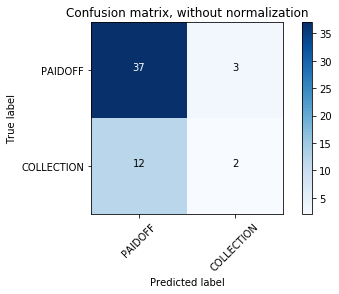

              precision    recall  f1-score   support

  COLLECTION       0.40      0.14      0.21        14
     PAIDOFF       0.76      0.93      0.83        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.58      0.53      0.52        54
weighted avg       0.66      0.72      0.67        54



In [40]:
# This function prints and plots the confusion matrix. Normalization can be applied by setting 'normalize=True'.

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize=False, title='Confusion matrix, without normalization')
plt.show()

# Build a text report showing the main classification metrics
print(classification_report(y_test, yhat_KNN))

In [41]:
# Evaluating the Decision Tree model
yhat_Tree = loan_tree.predict(X_test)
print("DecisionTrees's Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat_Tree))
print("DecisionTrees's Avg f1-score: %.4f" % f1_score(y_test, yhat_Tree, average='weighted'))

DecisionTrees's Jaccard score: 0.7407
DecisionTrees's Avg f1-score: 0.6304


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

Confusion matrix, without normalization
[[40  0]
 [14  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


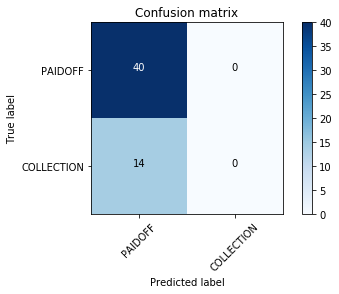

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
cnf_matrix = confusion_matrix(y_test, yhat_Tree, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_Tree))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize=False, title='Confusion matrix')
plt.show()

# Build a text report showing the main classification metrics
print(classification_report(y_test, yhat_Tree))

In [43]:
# Evaluating the Logistic Regression model
yhat_LR = loanLR.predict(X_test)
yhat_LR_prob = loanLR.predict_proba(X_test)
print("LR's Jaccard score is: %.4f" % jaccard_similarity_score(y_test, yhat_LR))
print("LR's Avg f1-score is: %.4f" % f1_score(y_test, yhat_LR, average='weighted'))
print("LR's LogLoss is: : %.4f" % log_loss(y_test, yhat_LR_prob))

LR's Jaccard score is: 0.7407
LR's Avg f1-score is: 0.6304
LR's LogLoss is: : 0.5828


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

Confusion matrix, without normalization
[[40  0]
 [14  0]]


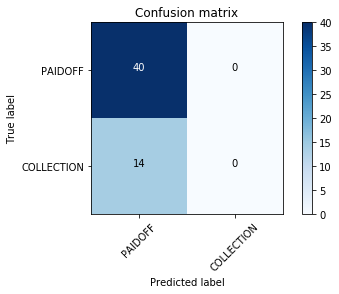

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_LR))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize=False, title='Confusion matrix')
plt.show()

# Build a text report showing the main classification metrics
print(classification_report(y_test, yhat_LR))

In [45]:
# Evaluating the SVC model
yhat_SVM = loanSVC.predict(X_test)
print("SVM's Jaccard score is: %.4f" % jaccard_similarity_score(y_test, yhat_SVM))
print("SVM's Avg f1-score is: %.4f" % f1_score(y_test, yhat_SVM, average='weighted'))

SVM's Jaccard score is: 0.7593
SVM's Avg f1-score is: 0.6718


              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54

Confusion matrix, without normalization
[[40  0]
 [13  1]]


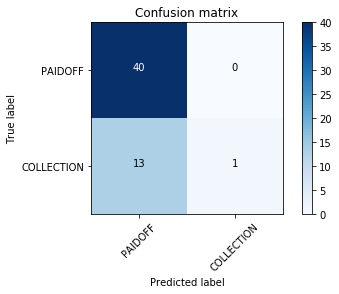

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



In [46]:
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_SVM))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize=False, title='Confusion matrix')
plt.show()

# Build a text report showing the main classification metrics
print(classification_report(y_test, yhat_SVM))

In [0]:
# Report
# We are able to report the accuracy of the built model using different evaluation metrics:

# | Algorithm          | Jaccard | F1-score | LogLoss |
# |--------------------|---------|----------|---------|
# | KNN                | 0.7222  | 0.6705   | NA      |
# | Decision Tree      | 0.7407  | 0.6304   | NA      |
# | SVM                | 0.7593  | 0.6718   | NA      |
# | LogisticRegression | 0.7407  | 0.6304   | 0.5828  |